<a href="https://colab.research.google.com/github/babelPish/slaw/blob/master/spacy_basic/colab_notebooks/05_working_with_word_vectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#5. Woking with word vectors
* 바벨피쉬 : Slaw - Spacy 기초
* 김무성

In [4]:
!python -V

Python 3.6.9


-------------

# Installation




#### 시각화 도구 (한글 나오게)
* 구글 Colab에서 한글 문제 대응하기 - https://pinkwink.kr/1255
* https://rasahq.github.io/whatlies/
* https://spacy.io/universe/project/whatlies

In [99]:
# -- 한글폰트 지원을 위한 설치
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.


In [ ]:
# -- 여기까지 하고 런타임 재시작 후 아래 실행.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

In [2]:
# 현재 설정되어 있는 폰트 사이즈와 글꼴을 알아보자
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

Python 3.6.9
설정 폰트 글꼴: ['NanumBarunGothic'], 설정 폰트 사이즈: 10.0


In [4]:
# -- whatlies
!pip install whatlies

     |████████████████████████████████| 24.2MB 1.6MB/s 
     |████████████████████████████████| 1.8MB 38.2MB/s 
     |████████████████████████████████| 61kB 6.2MB/s 
     |████████████████████████████████| 71kB 6.6MB/s 
     |████████████████████████████████| 1.1MB 34.2MB/s 
  Created wheel for sense2vec: filename=sense2vec-1.0.2-py2.py3-none-any.whl size=34997 sha256=b41528fa86082765ec9eabccf60a46408f88f6ecf759dd270bc69902dce3a575
  Stored in directory: /root/.cache/pip/wheels/55/86/94/9dbbd58956c20435a4ca918ea5a0dfdec3ad4e9568c3f41b3e
  Created wheel for fasttext: filename=fasttext-0.9.2-cp36-cp36m-linux_x86_64.whl size=3018341 sha256=d102213da57ea5a8491905489f37ff60219a157c7dc9e3200b4b123752546763
  Stored in directory: /root/.cache/pip/wheels/98/ba/7f/b154944a1cf5a8cee91c154b75231136cc3a3321ab0e30f592
Successfully built sense2vec fasttext
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


#### spaCy 설치 

In [3]:
# 이미 설치되어 있다. 만약 안되어 있으면
# !pip install spacy 
# 혹시 2.2.3이 설치되면 아래처럼 pip 업데이트 후 spacy 재설치 
# !pip install -U pip 

# 버전이 2.2.4 일것. 이 버전에 맞춰서 korean word2vec 실습모델 셋팅함.
import spacy
spacy.__version__ 

'2.2.4'

#### spaCy Lanage Models

In [6]:
# 최초 한번만 다운로드 하면 됨
# 그리고 런타임 재시작
# !python -m spacy download en 

In [79]:
# 최초 한번만 다운로드 하면 됨
# 그리고 런타임 재시작
#!python -m spacy download en_core_web_md

     |████████████████████████████████| 96.4MB 83.7MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-cp36-none-any.whl size=98051305 sha256=f38ef8efd2227c4a5a7e22bad1efe1ab30eb4725cd8f463fc81db768a905d091
  Stored in directory: /tmp/pip-ephem-wheel-cache-hywogkjg/wheels/df/94/ad/f5cf59224cea6b5686ac4fd1ad19c8a07bc026e13c36502d81
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


#### 한국어 지원

In [7]:
#spacy는 현재 colab에서는 기본 설치되어 있다. 한국어 지원만 다음 과정을 따르면 된다.

In [8]:
# 한국어 형태소 분석을 위한 mecab-ko 설치가 필요하다.
#remove " > /dev/null 2>&1" to see what is going on under the hood
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git > /dev/null 2>&1

In [9]:
cd Mecab-ko-for-Google-Colab

/content/Mecab-ko-for-Google-Colab


In [10]:
!bash install_mecab-ko_on_colab190912.sh > /dev/null 2>&1

In [11]:
# natto-py를 설치해야 mecab-ko를 spaCy에 연동가능하다.
!pip install natto-py > /dev/null 2>&1

In [4]:
# 한국어 처리 가능여부 테스트. 이 코드가 제대로 실행되면 spaCy 한국어 지원이 제대로 된 것이다.
from spacy.lang.ko import Korean

nlp_ko = Korean()

doc = nlp_ko(u'이것은 문장이다') #Creates a Doc object 

for token in doc:  
    print(token.text, token.pos_, token.tag_) #prints the text and POS

이것 PRON NP
은 ADP JX
문장 NOUN NNG
이 ADP VCP
다 X EC


In [3]:
cd /content

/content


---------

# UNDERSTANDING WORD VECTORS

## Defining Meaning with Coordinates

## Using Dimensions to Represent Meaning

## The Similarity Method

In [4]:
import spacy

In [5]:
nlp = spacy.load('en')

In [6]:
doc=nlp('I want a green apple.')

In [7]:
doc.similarity(doc[2:5])

/usr/lib/python3.6/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)


0.7797949542342982

In [ ]:
# 스몰 모델들은 word vector들이 없다. 
# 좀 큰 모델들을 쓰자.
# 참고 - https://spacy.io/usage/vectors-similarity

In [8]:
nlp = spacy.load('en_core_web_md')

In [9]:
doc=nlp('I want a green apple.')
doc.similarity(doc[2:5])

0.8776482403927138

In [10]:
doc2=nlp('I like red oranges.')

In [11]:
doc2.similarity(doc[2:5])

0.7266315063402384

In [12]:
token = doc2[3:4][0]


In [13]:
token

oranges

In [14]:
doc[4:5]

apple

In [15]:
token.similarity(doc[4:5])

0.50937694

## Choosing Keywords for Semantic Simlarity Calculation

# INSTALLING WORD VECTORS

## Taking Advantage of Word Vectors That Come with spaCy Models

* https://github.com/explosion/spacy-models/releases/

## Using Third-Party Word Vectors

* https://fasttext.cc/docs/en/english-vectors.html


In [19]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip

--2020-07-09 05:21:07--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 172.67.9.4, 104.22.75.142, 104.22.74.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|172.67.9.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 681808098 (650M) [application/zip]
Saving to: ‘wiki-news-300d-1M.vec.zip’

wiki-news-300d-1M.v 100%[===================>] 650.22M  22.5MB/s    in 30s     

2020-07-09 05:21:37 (21.9 MB/s) - ‘wiki-news-300d-1M.vec.zip’ saved [681808098/681808098]



In [22]:
!ls

mecab-0.996-ko-0.9.2		    Mecab-ko-for-Google-Colab
mecab-0.996-ko-0.9.2.tar.gz	    sample_data
mecab-ko-dic-2.1.1-20180720	    wiki-news-300d-1M.vec.zip
mecab-ko-dic-2.1.1-20180720.tar.gz


In [25]:
!unzip wiki-news-300d-1M.vec.zip

Archive:  wiki-news-300d-1M.vec.zip
  inflating: wiki-news-300d-1M.vec   


In [26]:
!ls

mecab-0.996-ko-0.9.2		    Mecab-ko-for-Google-Colab
mecab-0.996-ko-0.9.2.tar.gz	    sample_data
mecab-ko-dic-2.1.1-20180720	    wiki-news-300d-1M.vec
mecab-ko-dic-2.1.1-20180720.tar.gz  wiki-news-300d-1M.vec.zip


In [27]:
!ls /tmp

mecab-python-0.996


In [28]:
!python -m spacy init-model en /tmp/en_vectors_wiki_lg --vectors-loc wiki-news-300d-1M.vec

✔ Successfully created model
⠙ Reading vectors from wiki-news-300d-1M.vectcmalloc: large alloc 1199996928 bytes == 0x3e28000 @  0x7fba3ec69001 0x7fba3c7cd765 0x7fba3c831bb0 0x7fba3c833a4f 0x7fba3c8ca048 0x50a635 0x50cd96 0x509758 0x50a48d 0x50bfb4 0x507d64 0x509a90 0x50a48d 0x50bfb4 0x507d64 0x588d41 0x59fc4e 0x50d356 0x507d64 0x509a90 0x50a48d 0x50bfb4 0x507d64 0x509a90 0x50a48d 0x50bfb4 0x507d64 0x516345 0x50a2bf 0x50bfb4 0x507d64
999994it [01:12, 13721.26it/s]
✔ Loaded vectors from wiki-news-300d-1M.vec
✔ Sucessfully compiled vocab
1000207 entries, 999994 vectors


In [29]:
!ls /tmp

en_vectors_wiki_lg  mecab-python-0.996


In [30]:
nlp = spacy.load('/tmp/en_vectors_wiki_lg')

In [31]:
doc = nlp(u'Hi there!')

In [32]:
doc2 = nlp(u'Hello!')

In [33]:
doc.similarity(doc2)

0.7745887808397667

In [35]:
list(doc.sents)

ValueError: ignored

# COMPARING SPACY OBJECTS

## Using Semantic Similarity for Categorization Tasks

In [16]:
import spacy

In [17]:
nlp = spacy.load('en')

In [18]:
token = nlp(u'fruits')[0]

In [19]:
dir(token)

['_',
 '__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 'ancestors',
 'check_flag',
 'children',
 'cluster',
 'conjuncts',
 'dep',
 'dep_',
 'doc',
 'ent_id',
 'ent_id_',
 'ent_iob',
 'ent_iob_',
 'ent_kb_id',
 'ent_kb_id_',
 'ent_type',
 'ent_type_',
 'get_extension',
 'has_extension',
 'has_vector',
 'head',
 'i',
 'idx',
 'is_alpha',
 'is_ancestor',
 'is_ascii',
 'is_bracket',
 'is_currency',
 'is_digit',
 'is_left_punct',
 'is_lower',
 'is_oov',
 'is_punct',
 'is_quote',
 'is_right_punct',
 'is_sent_start',
 'is_space',
 'is_stop',
 'is_title',
 'is_upper',
 'lang',
 'lang_',
 'left_edge',
 'lefts',
 'lemma',
 'lemma_',
 'lex_id',
 'like_email',
 'li

In [20]:
len(token.vector)

96

In [21]:
token.vector

array([-0.42313766, -1.5219803 ,  1.8062537 , -0.10860249,  4.2001243 ,
        1.0371083 ,  1.6287208 , -0.9370397 ,  3.622073  ,  1.673081  ,
        1.3778045 ,  1.2819282 , -1.2067546 , -1.656326  , -2.265429  ,
       -4.2958536 , -1.6239485 ,  2.0366178 ,  3.4640632 ,  0.801809  ,
       -0.7266513 ,  2.2622411 , -1.3504235 , -2.0843291 ,  0.04761223,
       -1.5259031 , -1.3454005 , -0.6611922 , -0.5495672 , -0.3901107 ,
        0.48570472, -0.3916537 , -0.7102418 , -0.06347874, -1.1732581 ,
       -2.8313022 ,  2.410955  ,  1.8356858 ,  0.9147787 ,  0.93207747,
        4.1247177 ,  2.0704372 , -1.7011753 , -4.559993  ,  2.6494184 ,
        1.1709806 ,  0.9448991 , -1.465476  ,  0.23902848,  0.6384096 ,
        0.6676779 , -2.0990973 , -2.906227  ,  1.2280506 , -0.41311637,
       -0.96673214,  0.23182857, -0.2629048 ,  0.6141429 ,  1.3221782 ,
       -2.2965207 ,  5.1121726 , -1.156902  ,  0.9593956 , -0.04784768,
       -2.7432258 ,  1.4514859 , -2.959045  ,  0.13119525, -0.57

In [22]:
doc = nlp(u'I want to buy this beautiful book at the end of the week. Sales of citrus have increased over the last year. How much do you know about this type of tree?')

In [23]:
for sent in doc.sents:
  print(sent.text)
  print('similarity to', token.text, 'is', token.similarity(sent),'\n')

I want to buy this beautiful book at the end of the week.
similarity to fruits is 0.23322244 

Sales of citrus have increased over the last year.
similarity to fruits is 0.3847329 

How much do you know about this type of tree?
similarity to fruits is 0.1432642 



/usr/lib/python3.6/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

In [24]:
nlp = spacy.load('en_core_web_md')

In [25]:
token = nlp(u'fruits')[0]

In [27]:
dir(token)

['_',
 '__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 'ancestors',
 'check_flag',
 'children',
 'cluster',
 'conjuncts',
 'dep',
 'dep_',
 'doc',
 'ent_id',
 'ent_id_',
 'ent_iob',
 'ent_iob_',
 'ent_kb_id',
 'ent_kb_id_',
 'ent_type',
 'ent_type_',
 'get_extension',
 'has_extension',
 'has_vector',
 'head',
 'i',
 'idx',
 'is_alpha',
 'is_ancestor',
 'is_ascii',
 'is_bracket',
 'is_currency',
 'is_digit',
 'is_left_punct',
 'is_lower',
 'is_oov',
 'is_punct',
 'is_quote',
 'is_right_punct',
 'is_sent_start',
 'is_space',
 'is_stop',
 'is_title',
 'is_upper',
 'lang',
 'lang_',
 'left_edge',
 'lefts',
 'lemma',
 'lemma_',
 'lex_id',
 'like_email',
 'li

In [28]:
len(token.vector)

300

In [29]:
doc = nlp(u'I want to buy this beautiful book at the end of the week. Sales of citrus have increased over the last year. How much do you know about this type of tree?')


In [30]:
for sent in doc.sents:
  print(sent.text)
  print('similarity to', token.text, 'is', token.similarity(sent),'\n')

I want to buy this beautiful book at the end of the week.
similarity to fruits is 0.31009278 

Sales of citrus have increased over the last year.
similarity to fruits is 0.38043892 

How much do you know about this type of tree?
similarity to fruits is 0.34322935 



## Extracting Nouns as a Preprocessing Step

In [31]:
import spacy

In [32]:
spacy.load("en_core_web_md")

In [33]:
token = nlp(u'fruits')[0]

In [34]:
doc = nlp(u'I want to buy this beautiful book at the end of the week. Sales of citrus have increased over the last year. How much do you know about this type of tree?')

In [37]:
similarity = {}

In [38]:
for i, sent in enumerate(doc.sents):
  print(sent)
  noun_span_str = [sent[j].text for j in range(len(sent)) if sent[j].pos_ == 'NOUN']
  print(noun_span_str)
  
  noun_span_str = ' '.join(noun_span_str)
  print(noun_span_str)
  
  noun_span_doc = nlp(noun_span_str)
  
  similarity.update({i:token.similarity(noun_span_doc)})
  print(similarity)                                             

I want to buy this beautiful book at the end of the week.
['book', 'end', 'week']
book end week
{0: 0.21712277267612565}
Sales of citrus have increased over the last year.
['Sales', 'citrus', 'year']
Sales citrus year
{0: 0.21712277267612565, 1: 0.4317850954030255}
How much do you know about this type of tree?
['type', 'tree']
type tree
{0: 0.21712277267612565, 1: 0.4317850954030255, 2: 0.3960727120792394}


In [39]:
print(similarity)

{0: 0.21712277267612565, 1: 0.4317850954030255, 2: 0.3960727120792394}


## Try This

## Extracting and Comparing Named Entities

In [40]:
import spacy

In [41]:
spacy.load("en_core_web_md")

In [42]:
#first sample text
doc1 = nlp(u'Google Search, often referred to as simply Google, is the most used search engine nowadays. It handles a huge number of searches each day.')

In [43]:
#second sample text
doc2 = nlp(u'Microsoft Windows is a family of proprietary operating systems developed and sold by Microsoft. The company also produces a wide range of other software for desktops and servers.')

In [45]:
#third sample text
doc3 = nlp(u"Titicaca is a large, deep, mountain lake in the Andes. It is known as the highest navigable lake in the world.")

In [46]:
docs = [doc1, doc2, doc3]

In [56]:
spans = {}

In [57]:
for j, doc in enumerate(docs):
  print(doc)
  
  named_entity_span = [doc[i].text for i in range(len(doc)) 
                                          if doc[i].ent_type != 0]
  print(named_entity_span)
  
  named_entity_span = ' '.join(named_entity_span)
  print(named_entity_span)
  print(type(named_entity_span))
  
  named_entity_span = nlp(named_entity_span)
  print(named_entity_span)
  print(type(named_entity_span))

  spans.update({j:named_entity_span})
  print(spans)

Google Search, often referred to as simply Google, is the most used search engine nowadays. It handles a huge number of searches each day.
['Google', 'Search', 'Google', 'each', 'day']
Google Search Google each day
<class 'str'>
Google Search Google each day
<class 'spacy.tokens.doc.Doc'>
{0: Google Search Google each day}
Microsoft Windows is a family of proprietary operating systems developed and sold by Microsoft. The company also produces a wide range of other software for desktops and servers.
['Microsoft', 'Microsoft']
Microsoft Microsoft
<class 'str'>
Microsoft Microsoft
<class 'spacy.tokens.doc.Doc'>
{0: Google Search Google each day, 1: Microsoft Microsoft}
Titicaca is a large, deep, mountain lake in the Andes. It is known as the highest navigable lake in the world.
['Titicaca', 'mountain', 'lake', 'Andes', 'navigable', 'lake']
Titicaca mountain lake Andes navigable lake
<class 'str'>
Titicaca mountain lake Andes navigable lake
<class 'spacy.tokens.doc.Doc'>
{0: Google Search 

In [55]:
print(spans)

{0: Google Search Google each day, 1: Microsoft Microsoft, 2: Titicaca mountain lake Andes navigable lake}


In [58]:
print('doc1 is similar to doc2:',spans[0].similarity(spans[1]))
print('doc1 is similar to doc3:',spans[0].similarity(spans[2]))
print('doc2 is similar to doc3:',spans[1].similarity(spans[2]))

doc1 is similar to doc2: 0.46243715098716676
doc1 is similar to doc3: 0.31272072485181934
doc2 is similar to doc3: 0.18954702564452963


-------------

# Pretrained 한국어 Word2Vec을 spaCy에서 사용하기

#### 참고 
* spaCy official doc. Word Vectors and Semantic Similarity - https://spacy.io/usage/vectors-similarity
* gensim official doc. models.keyedvectors – Store and query word vectors - https://radimrehurek.com/gensim/models/keyedvectors.html
* GENSIM WORD2VEC SIMPLE USAGE - https://gorakgarak.tistory.com/1330
* 딥 러닝을 이용한 자연어 처리 입문 - 영어/한국어 Word2Vec 실습 WikiDocs
3) 영어/한국어 Word2Vec 실습 - https://wikidocs.net/50739
* Pre-trained word vectors of 30+ languages - https://github.com/Kyubyong/wordvectors

#### spaCy 모델로 만들기

In [59]:
!git clone https://github.com/babelPish/slaw.git

Cloning into 'slaw'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 179 (delta 9), reused 0 (delta 0), pack-reused 153
Receiving objects: 100% (179/179), 177.18 MiB | 30.80 MiB/s, done.
Resolving deltas: 100% (69/69), done.
Checking out files: 100% (20/20), done.


In [60]:
ls

mecab-0.996-ko-0.9.2/               sample_data/
mecab-0.996-ko-0.9.2.tar.gz         slaw/
mecab-ko-dic-2.1.1-20180720/        wiki-news-300d-1M.vec
mecab-ko-dic-2.1.1-20180720.tar.gz  wiki-news-300d-1M.vec.zip
Mecab-ko-for-Google-Colab/


In [61]:
cd /content/slaw/spacy_basic/colab_notebooks/

/content/slaw/spacy_basic/colab_notebooks


In [62]:
ls

05_working_with_word_vectors.ipynb  models/


In [63]:
cd models

/content/slaw/spacy_basic/colab_notebooks/models


In [64]:
ls

ko_ft_gensim/  ko_ft_spacy/  ko_wv/  ko_wv_gensim/  ko_wv_spacy/


In [65]:
cd ko_wv

/content/slaw/spacy_basic/colab_notebooks/models/ko_wv


In [66]:
ls

ko.zip


In [67]:
!unzip ko.zip

Archive:  ko.zip
  inflating: ko.bin                  
  inflating: ko.tsv                  


In [68]:
import gensim

In [69]:
model = gensim.models.Word2Vec.load('ko.bin')

In [70]:
kv = model.wv

In [71]:
kv.save_word2vec_format('ko_wv.embd', binary=False)

In [72]:
ls

ko.bin  ko.tsv  ko_wv.embd  ko.zip


In [73]:
!python -m spacy init-model ko ko_wv.spacy.embd --vectors-loc ko_wv.embd

✔ Successfully created model
30185it [00:01, 16528.72it/s]
✔ Loaded vectors from ko_wv.embd
✔ Sucessfully compiled vocab
30185 entries, 30185 vectors


In [74]:
ls

ko.bin  ko.tsv  ko_wv.embd  ko_wv.spacy.embd/  ko.zip


In [75]:
ls ko_wv.spacy.embd

meta.json  vocab/


#### 만들어진 모델 로드해서 사용하기

In [76]:
nlp_ko_wv = spacy.load('ko_wv.spacy.embd')

In [77]:
doc1 = nlp_ko_wv('안녕하세요') 

In [78]:
doc2 = nlp_ko_wv('안녕')

In [79]:
doc3 = nlp_ko_wv('반갑다')

In [80]:
doc4 = nlp_ko_wv('강아지')

In [81]:
doc5 = nlp_ko_wv('겔럭시')

In [82]:
doc6 = nlp_ko_wv('갤럭시')

In [83]:
doc1.similarity(doc1)

1.0

In [84]:
doc1.similarity(doc2)

0.3767422436269971

In [85]:
doc1.similarity(doc3)

0.06939425105226041

In [86]:
doc1.similarity(doc4)

-0.038436487747098264

In [87]:
doc5.similarity(doc6)

0.2627900996926142

#### 시각화

#### 참고
* https://www.kaggle.com/zackakil/
* https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1

In [5]:
cd /content

/content


In [6]:
!ls /content/slaw/spacy_basic/colab_notebooks/models/ko_wv_spacy

ko_wv.spacy.embd


In [7]:
ko_wv_spacy_model_path = '/content/slaw/spacy_basic/colab_notebooks/models/ko_wv_spacy/ko_wv.spacy.embd'

In [8]:
nlp_ko_wv = spacy.load(ko_wv_spacy_model_path)

In [ ]:
# 임베딩 벡터 시각화

In [9]:
# import the PCA module from sklearn
from sklearn.decomposition import PCA

In [10]:
import matplotlib.pyplot as plt

In [11]:
def get_word_vectors(words, nlp):
    # converts a list of words into their word vectors
    return [nlp(word).vector for word in words]

In [ ]:
# -- pca로 2차원으로 만들어서 비교

In [12]:
words = ['개', '고양이', '고냥이', '호랑이', '물고기', '어항', '서울', '부산', '소년', '소녀', '남자', '여자', '왕', '여왕', '갤럭시', '겔럭시', '갤럭시S']


In [13]:
pca = PCA(n_components=2)

word_vecs_2d = pca.fit_transform(get_word_vectors(words, nlp_ko_wv))

In [14]:
# let's look at our new 2D word vectors
word_vecs_2d

array([[ 7.05820496,  0.29064889],
       [-5.11078507, -0.48736596],
       [ 0.83681329, -0.18886111],
       [-1.71393893, -1.14019936],
       [-3.14083547,  1.32684867],
       [13.91980054,  7.60919949],
       [ 8.61786939, -6.42035333],
       [ 9.57121242, -6.37529967],
       [-5.26221941, -3.99789804],
       [-8.79895288, -6.52531741],
       [-7.19391036, -4.06245702],
       [-4.25858685, -4.53677859],
       [-5.86611941, 13.81088281],
       [-5.34314213,  8.19349578],
       [ 2.10699856,  0.36363953],
       [ 2.61780751,  1.66568144],
       [ 1.95978385,  0.47413387]])

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


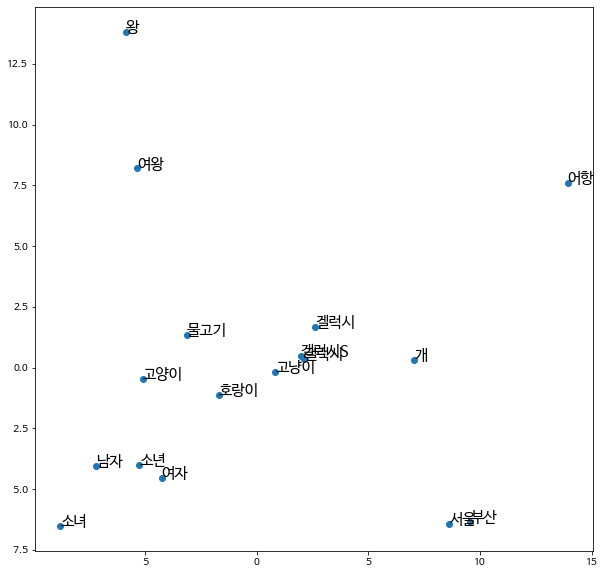

In [15]:
# create a nice big plot 
plt.figure(figsize=(10,10))

# plot the scatter plot of where the words will be
plt.scatter(word_vecs_2d[:,0], word_vecs_2d[:,1])

# for each word and coordinate pair: draw the text on the plot
for word, coord in zip(words, word_vecs_2d):
    x, y = coord
    plt.text(x, y, word, size= 15)

# show the plot
plt.show()

In [16]:
from sklearn.manifold import TSNE

In [17]:
tsne = TSNE(n_components=2) 

word_vecs_2d_tsne = tsne.fit_transform(get_word_vectors(words, nlp_ko_wv))

In [18]:
word_vecs_2d_tsne

array([[  9.12101  , -15.940932 ],
       [  3.7159054, -32.76635  ],
       [-24.791721 ,  -5.0096893],
       [-15.359202 , -25.20944  ],
       [ 23.054605 ,  -6.0035625],
       [ 12.341296 ,  34.34906  ],
       [  6.7778425,   0.8672296],
       [ -8.957181 ,   7.7277617],
       [-24.333515 ,  16.259125 ],
       [ 38.470383 ,   7.3563876],
       [ -6.746007 ,  -9.7791815],
       [ -8.87466  ,  30.184904 ],
       [ 20.087856 ,  11.055058 ],
       [ 24.391796 , -26.797853 ],
       [  4.7828293,  18.206245 ],
       [ 39.671177 , -12.79558  ],
       [ 30.076609 ,  25.766846 ]], dtype=float32)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


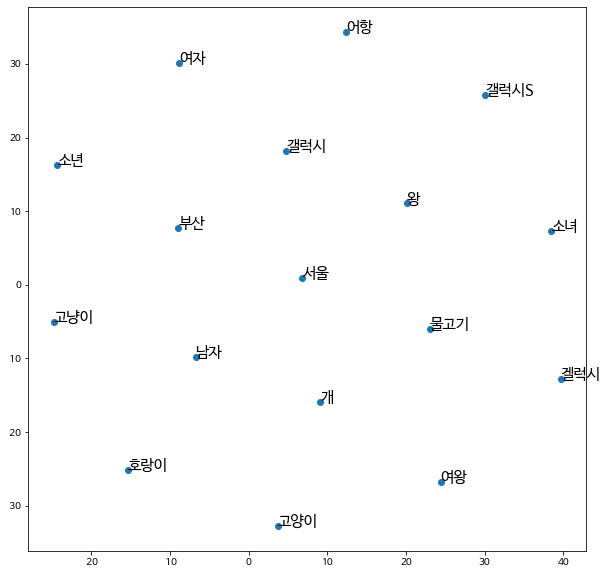

In [19]:
# create a nice big plot 
plt.figure(figsize=(10,10))

# plot the scatter plot of where the words will be
plt.scatter(word_vecs_2d_tsne[:,0], word_vecs_2d_tsne[:,1])

# for each word and coordinate pair: draw the text on the plot
for word, coord in zip(words, word_vecs_2d_tsne):
    x, y = coord
    plt.text(x, y, word, size= 15)

# show the plot
plt.show()

#### 참고
* https://rasahq.github.io/whatlies/
* https://spacy.io/universe/project/whatlies

In [ ]:
# whatlies 사용해보기

In [20]:
from whatlies import EmbeddingSet
from whatlies.language import SpacyLanguage

In [21]:
ls /content/slaw/spacy_basic/colab_notebooks/models/ko_wv_spacy

ko_wv.spacy.embd/


In [22]:
vm_ko_path = "/content/slaw/spacy_basic/colab_notebooks/models/ko_wv_spacy/ko_wv.spacy.embd"

In [23]:
lang = SpacyLanguage(vm_ko_path)

In [24]:
words = ['개', '고양이', '고냥이', '호랑이', '물고기', '어항', '서울', '부산', '소년', '소녀', '남자', '여자', '왕', '여왕', '갤럭시', '겔럭시', '갤럭시S']

In [25]:
emb = lang[words]
emb.plot_interactive(x_axis='남자', y_axis='여자')

alt.LayerChart(...)

------------

# Pretrained 한국어 FastText를 spaCy에서 사용하기.
* 참고 
  - Pre-trained word vectors of 30+ languages - https://github.com/Kyubyong/wordvectors

In [26]:
cd /content/slaw/spacy_basic/colab_notebooks/models/

/content/slaw/spacy_basic/colab_notebooks/models


In [27]:
mkdir ko_ft

In [28]:
cd ko_ft

/content/slaw/spacy_basic/colab_notebooks/models/ko_ft


In [29]:
!wget https://www.dropbox.com/s/stt4y0zcp2c0iyb/ko.tar.gz

--2020-07-09 06:51:43--  https://www.dropbox.com/s/stt4y0zcp2c0iyb/ko.tar.gz
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/stt4y0zcp2c0iyb/ko.tar.gz [following]
--2020-07-09 06:51:43--  https://www.dropbox.com/s/raw/stt4y0zcp2c0iyb/ko.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0c693c30a8881059d9a869a8fe.dl.dropboxusercontent.com/cd/0/inline/A7KrXsTVR44uPADA__BeCw9KWFKUgM3i3UaigwEvy2_AGSW0jhtSCKOKMkhsAQbXdEEwH6L07oYrWLg96panGueFfJbLydfKg_jBHX-kDecSXA/file# [following]
--2020-07-09 06:51:44--  https://uc0c693c30a8881059d9a869a8fe.dl.dropboxusercontent.com/cd/0/inline/A7KrXsTVR44uPADA__BeCw9KWFKUgM3i3UaigwEvy2_AGSW0jhtSCKOKMkhsAQbXdEEwH6L07oYrWLg96panGueFfJbLydfKg_jBHX-kDecSXA/file
Resolving uc0c693c30a8881059

In [30]:
!tar xvfz ko.tar.gz

ko.bin
ko.vec


In [31]:
ls

ko.bin  ko.tar.gz  ko.vec


In [32]:
# 기본 3.6.0 이다.
import gensim
gensim.__version__

'3.8.3'

In [33]:
model = gensim.models.FastText.load_fasttext_format('ko.bin', encoding='utf8')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `load_fasttext_format` (use load_facebook_vectors (to use pretrained embeddings) or load_facebook_model (to continue training with the loaded full model, more RAM) instead).
  """Entry point for launching an IPython kernel.


In [34]:
kv = model.wv
kv.save_word2vec_format('ko_ft.embd', binary=False)

In [35]:
ls

ko.bin  ko_ft.embd  ko.tar.gz  ko.vec


In [36]:
!python -m spacy init-model ko ko_ft.spacy.embd --vectors-loc ko_ft.embd

✔ Successfully created model
30186it [00:01, 16479.71it/s]
✔ Loaded vectors from ko_ft.embd
✔ Sucessfully compiled vocab
30186 entries, 30186 vectors


In [37]:
ls

ko.bin  ko_ft.embd  ko_ft.spacy.embd/  ko.tar.gz  ko.vec


In [38]:
nlp_ko_ft = spacy.load('ko_ft.spacy.embd')

/usr/lib/python3.6/runpy.py:193: UserWarning: [W019] Changing vectors name from ko_model.vectors to ko_model.vectors_30186, to avoid clash with previously loaded vectors. See Issue #3853.
  "__main__", mod_spec)


In [39]:
doc1 = nlp_ko_ft('안녕하세요') 

doc2 = nlp_ko_ft('안녕')

doc3 = nlp_ko_ft('반갑다')

doc4 = nlp_ko_ft('강아지')

doc5 = nlp_ko_ft('겔럭시')

doc6 = nlp_ko_ft('갤럭시')

In [40]:
doc1.similarity(doc1)

1.0

In [41]:
doc1.similarity(doc2)

0.773866485570201

In [42]:
doc1.similarity(doc3)

0.47273435803752123

In [43]:
doc1.similarity(doc4)

0.23940142936136785

In [44]:
doc5.similarity(doc6)

0.5271651811388901

In [ ]:
# 시각화

In [45]:
# import the PCA module from sklearn
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

def get_word_vectors(words, nlp):
    # converts a list of words into their word vectors
    return [nlp(word).vector for word in words]



In [46]:
words = ['개', '고양이', '고냥이', '호랑이', '물고기', '어항', '서울', '부산', '소년', '소녀', '남자', '여자', '왕', '여왕', '갤럭시', '겔럭시', '갤럭시S']


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


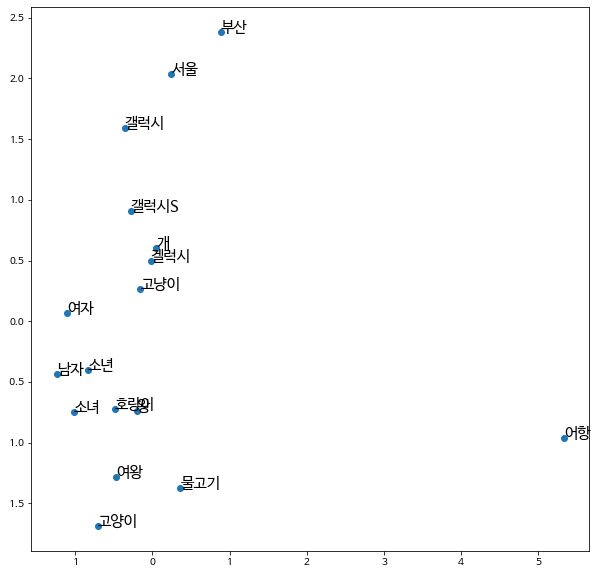

In [47]:
pca = PCA(n_components=2)

word_vecs_2d = pca.fit_transform(get_word_vectors(words, nlp_ko_ft))

# create a nice big plot 
plt.figure(figsize=(10,10))

# plot the scatter plot of where the words will be
plt.scatter(word_vecs_2d[:,0], word_vecs_2d[:,1])

# for each word and coordinate pair: draw the text on the plot
for word, coord in zip(words, word_vecs_2d):
    x, y = coord
    plt.text(x, y, word, size= 15)

# show the plot
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


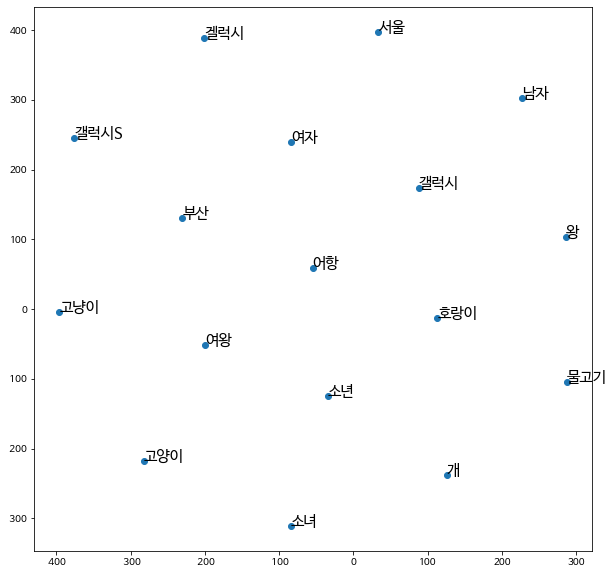

In [48]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2) 

word_vecs_2d_tsne = tsne.fit_transform(get_word_vectors(words, nlp_ko_ft))

# create a nice big plot 
plt.figure(figsize=(10,10))

# plot the scatter plot of where the words will be
plt.scatter(word_vecs_2d_tsne[:,0], word_vecs_2d_tsne[:,1])

# for each word and coordinate pair: draw the text on the plot
for word, coord in zip(words, word_vecs_2d_tsne):
    x, y = coord
    plt.text(x, y, word, size= 15)

# show the plot
plt.show()


In [49]:
from whatlies import EmbeddingSet
from whatlies.language import SpacyLanguage

In [50]:
ls /content/slaw/spacy_basic/colab_notebooks/models/ko_ft_spacy

ko_ft.spacy.embd/


In [51]:
vm_ft_ko_path = "/content/slaw/spacy_basic/colab_notebooks/models/ko_ft_spacy/ko_ft.spacy.embd"

In [52]:
lang_ft = SpacyLanguage(vm_ft_ko_path)

/usr/lib/python3.6/runpy.py:193: UserWarning: [W019] Changing vectors name from ko_model.vectors to ko_model.vectors_30186, to avoid clash with previously loaded vectors. See Issue #3853.
  "__main__", mod_spec)


In [53]:
words = ['개', '고양이', '고냥이', '호랑이', '물고기', '어항', '서울', '부산', '소년', '소녀', '남자', '여자', '왕', '여왕', '갤럭시', '겔럭시', '갤럭시S']


In [54]:
emb_ft = lang_ft[words]
emb_ft.plot_interactive(x_axis='남자', y_axis='여자')

alt.LayerChart(...)